# Lab 4.02

### Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

### Find all of the categorical data. Save it in a categorical_df variable.


In [6]:
data_cat = data.select_dtypes(['object'])
data_num = data._get_numeric_data()

### Check for NaN values.

In [7]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### Check all unique values of columns.

In [8]:
#https://www.statology.org/pandas-unique-values-in-column/

for col in data:
  print(data[col].unique())

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
[ 2763.519279  6979.535903 12887.43165  ...  8163.890428  7524.442436
  2611.836866]
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
[56274     0 48767 ... 66367 7

### Check dtypes. Do they all make sense as categorical data?

In [9]:
data_cat.dtypes
print(data['Response'])

#In my opinion these mostly do make sense as catagorical data. 
#You could argue that the date is not really usefull as a catagorical value.
# other than that the column costumer and costumer lifetime value are not usefull as categorical data. 

0        No
1        No
2        No
3        No
4        No
       ... 
9129     No
9130    Yes
9131     No
9132     No
9133     No
Name: Response, Length: 9134, dtype: object


### Does any column contain alpha and numeric data? Decide how to clean it.

In [10]:
# the costumer column is both alpha and numeric data. It depends on what you want to use the data for. but if you want to build a model.
# you could argue just to drop the table as it is just a random key assigned to that specific person.
# it should not have any effect on the data. 

### Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [11]:
# I would probably choose to take all the customer lifetime value data and assign the values to bins to make
# it easier to work with the information. 

### Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?


In [12]:
print(data['Policy Type'])
print(data['Policy'])

#In these collumns you find information about the policy an policy type.
# by the looks of it the columns are directly corelated so we could probably use just the Policy column, as it contains all information as seen in the policy type column.

0       Corporate Auto
1        Personal Auto
2        Personal Auto
3       Corporate Auto
4        Personal Auto
             ...      
9129     Personal Auto
9130    Corporate Auto
9131    Corporate Auto
9132     Personal Auto
9133    Corporate Auto
Name: Policy Type, Length: 9134, dtype: object
0       Corporate L3
1        Personal L3
2        Personal L3
3       Corporate L2
4        Personal L1
            ...     
9129     Personal L1
9130    Corporate L3
9131    Corporate L2
9132     Personal L2
9133    Corporate L3
Name: Policy, Length: 9134, dtype: object


### Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [13]:
print(data['Policy Type'].unique())
print(data['Policy'].unique())

#Why would i want to concat columns that are already directly corelated and categorized? i dont understand the question.

['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']


# start of Lab 4.03

### Open the categoricals variable we created before.

In [16]:
print(data_cat.columns)

data_cat.head(50)

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,XZ87318,Oregon,Yes,Basic,College,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
7,CF85061,Arizona,No,Premium,Master,1/18/11,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,DY87989,Oregon,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
9,BQ94931,Oregon,No,Extended,College,2/17/11,Employed,F,Urban,Married,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize


### Plot all the categorical variables with the proper plot. What can you see?

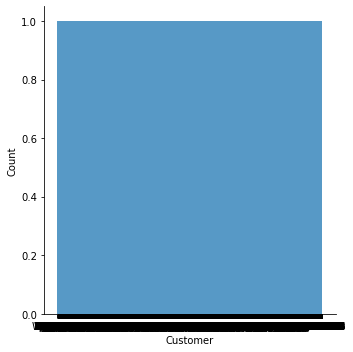

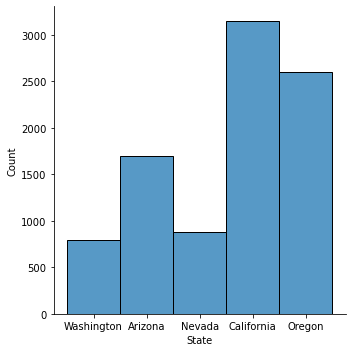

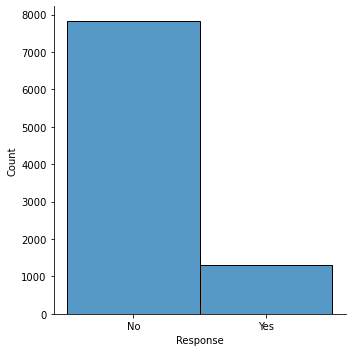

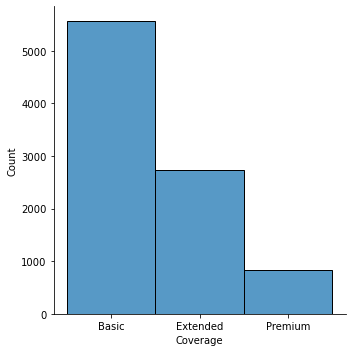

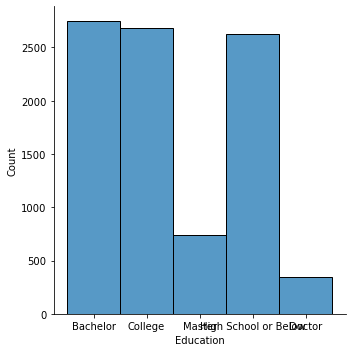

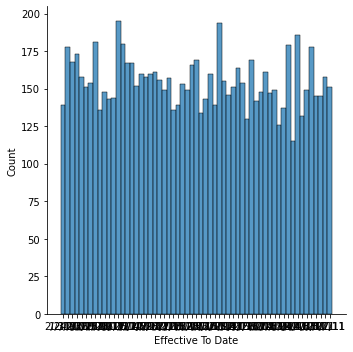

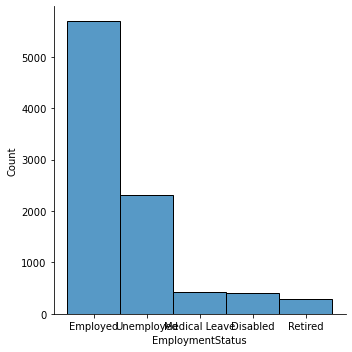

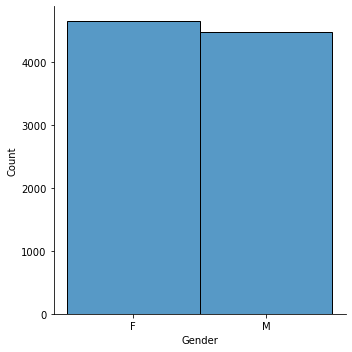

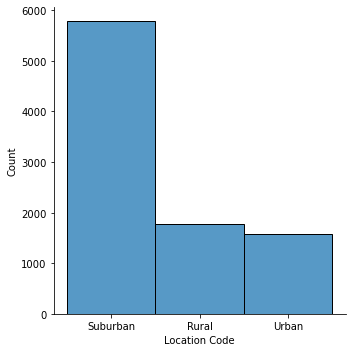

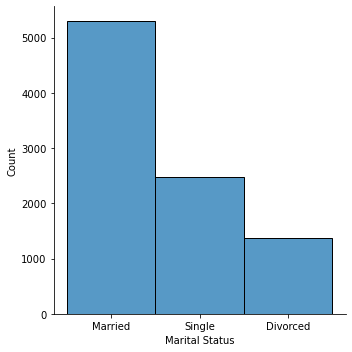

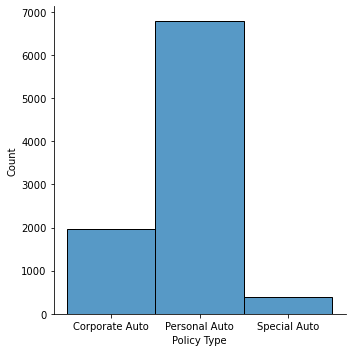

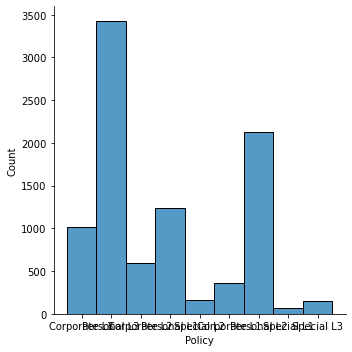

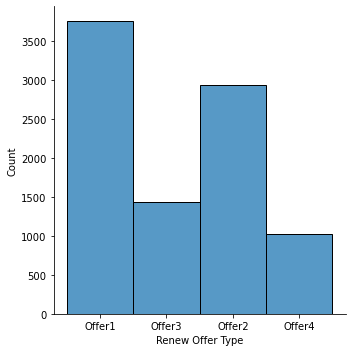

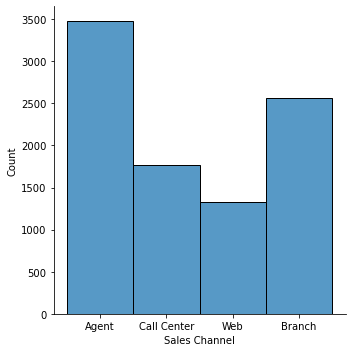

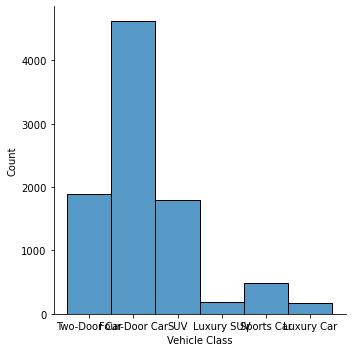

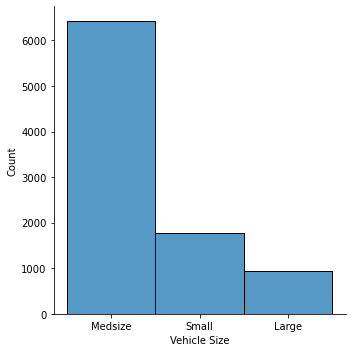

In [29]:
%matplotlib inline

for column in data_cat.columns:
    sns.displot(data_cat[column])
    plt.show()

### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [ ]:
# as stated somewhere in a previous lab, it looks to me that the customer catagory is redundant.
# Also the collumn effective to date seems redundant. You could also drop one of the policy collumns after what was asked
# last lab.

### Plot time variable. Can you extract something from it?

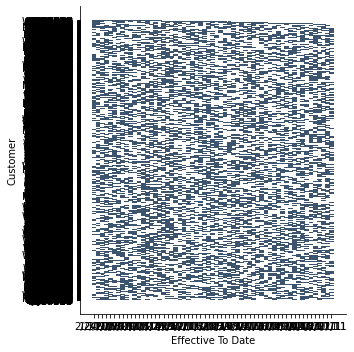

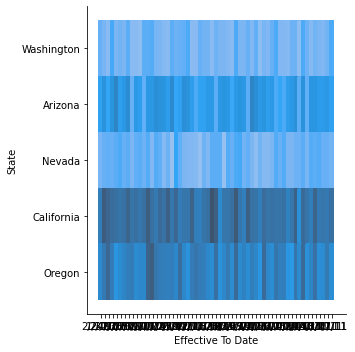

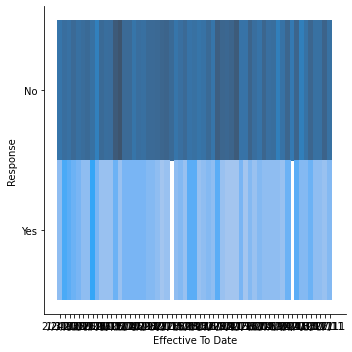

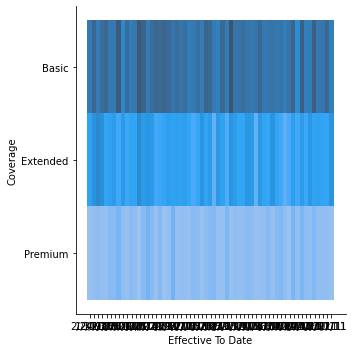

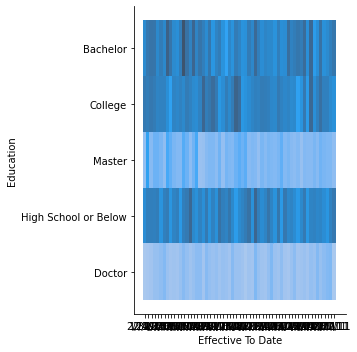

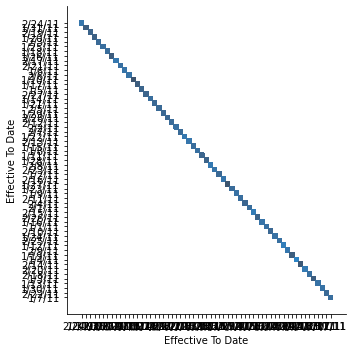

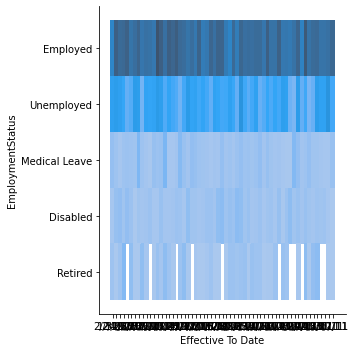

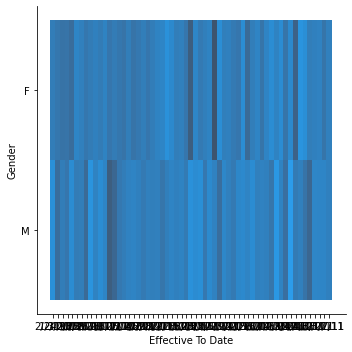

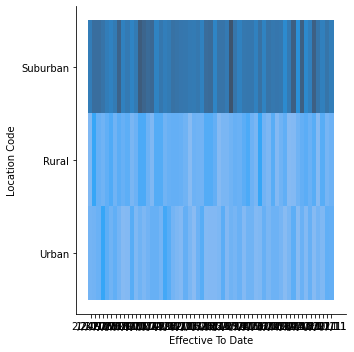

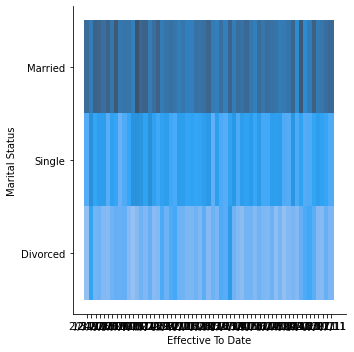

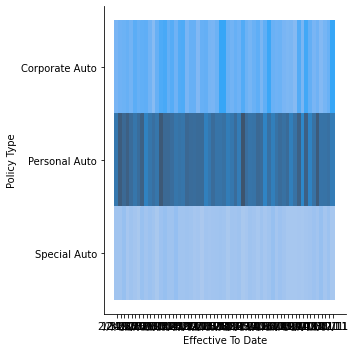

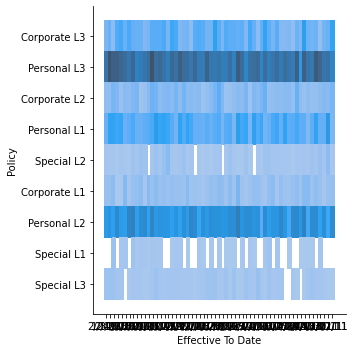

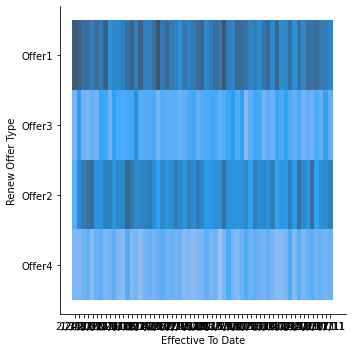

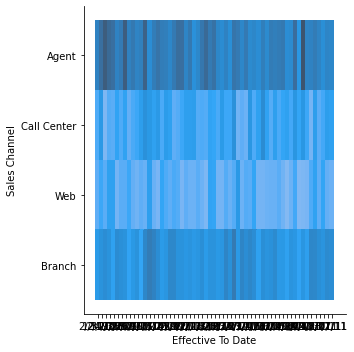

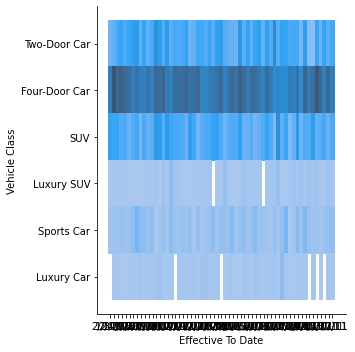

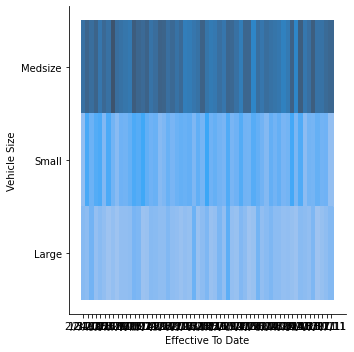

In [32]:
# for column in data_cat.columns:
#     sns.displot(x=data_cat['Effective To Date'],y=data_cat[column])
#     plt.show()

#Dont run this^

# maybe if we bin dates is might be more usefull